In [43]:
import MulensModel as mm
import matplotlib.pyplot as plt

In [44]:
my_pspl_model = mm.Model({'t_0': 2452848.06, 'u_0': 0.133, 't_E': 61.5})
my_1S2L_model = mm.Model({'t_0': 2452848.06, 'u_0': 0.133,
     't_E': 61.5, 'rho': 0.0008, 'q': 0.009, 's': 1.120,
     'alpha': 223.8})
my_1S2L_model.set_magnification_methods([2452833., 'VBBL', 2452845.])

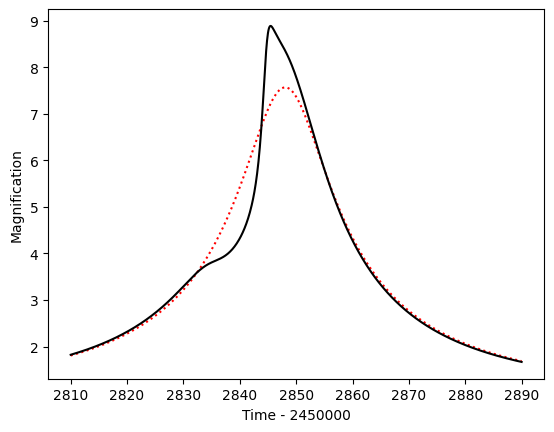

In [45]:
my_pspl_model.plot_magnification(t_range=[2452810, 2452890],
    subtract_2450000=True, color='red', linestyle=':')
my_1S2L_model.plot_magnification(t_range=[2452810, 2452890],
    subtract_2450000=True, color='black')
plt.show()

In [46]:
from astropy.io import ascii

metadata = ascii.read('microlensing_events.ipac', format='ipac') 


In [111]:
from astropy.io import ascii
import os
from tqdm import tqdm

# Read the IPAC file
fdir = "data/lightcurves/"
directory = os.fsencode(fdir)

curves = []

i = 0
for file in tqdm(os.listdir(directory)):
    filename = os.fsdecode(file)
    curve = ascii.read(fdir + filename, format='ipac') 
    curves.append(curve)
    i+=1
    if i == 100:
        break

  2%|▏         | 99/6113 [00:20<21:05,  4.75it/s] 


8724
[-- -- -- ... False -- --]
3360


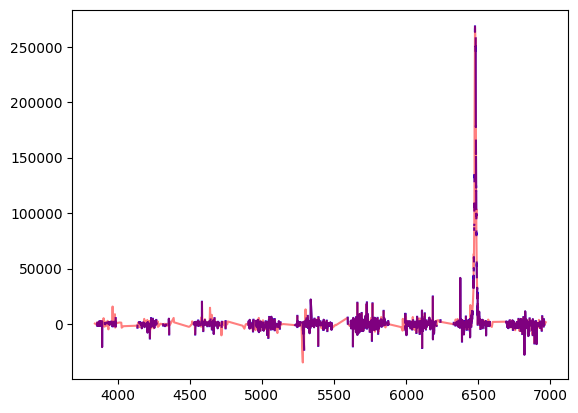

In [112]:
import numpy as np
sample = curves[0].copy()
print(len(sample["cor_flux"]))
plt.plot(sample['HJD'], sample["cor_flux"], color="blue")

mask = np.isnan(sample["cor_flux"]) | (sample["cor_flux"] == 0)

print(mask)

sample.remove_rows(np.where([c.data for c in sample.mask.itercols()])[-1])
print(len(sample["cor_flux"]))

#sample.remove_rows(np.isnan(sample["cor_flux"]) | (sample["cor_flux"] == i))

plt.plot(sample['HJD'], sample["cor_flux"], color="red", alpha=0.5)

Text(0.5, 0, 'Date (HJD)')

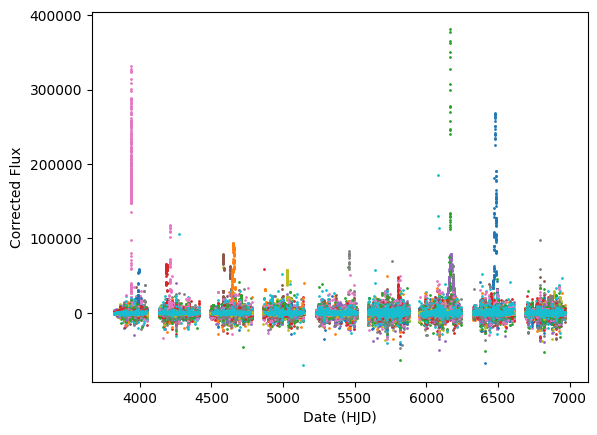

In [113]:
import matplotlib.pyplot as plt
import numpy as np
from preprocessing import remove_nan_rows

for i, curve in enumerate(curves):
    remove_nan_rows(curves[i])
    plt.scatter(curve['HJD'], curve["cor_flux"], s=1)


plt.ylabel("Corrected Flux")
plt.xlabel("Date (HJD)")


In [114]:
#nan check
nan_indices = np.isnan(curves[0]["cor_flux"]) 
print(nan_indices)
print(curves[0]["cor_flux"])

[False False False ... False False False]
  cor_flux  
------------
  345.646373
 -777.239933
   -6.945603
 1439.113928
    -25.7615
-1649.786382
  990.577021
 -655.362276
-1679.031324
  724.439913
         ...
 6897.048107
 1343.177947
 -233.539297
 1231.579384
-2275.596467
 -593.106536
  286.439056
 4129.768198
 -754.898778
 1531.014167
Length = 3360 rows
